**DATA PREPROCESSING MODULE**

**1.Loading Dataset**

In [ ]:
!pip install --upgrade xlrd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/Global Data Superstore (1).xls'

# Try to read the file with a different engine
try:
    df = pd.read_excel(file_path, engine='xlrd')
except:
    # If xlrd fails, try openpyxl
    df = pd.read_excel(file_path, engine='openpyxl')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


In [ ]:
df.shape

(51290, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

**2.Checking Null values**

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Row ID,0.00000
Order ID,0.00000
Order Date,0.00000
Ship Date,0.00000
Ship Mode,0.00000
Customer ID,0.00000
Customer Name,0.00000
Segment,0.00000
City,0.00000
State,0.00000


**3.Checking for Duplicates**

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

**4.Checking for Garbage Values**

In [ ]:
#identifying Garbage values
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)

Order ID
CA-2014-100111    14
NI-2014-8880      13
TO-2014-9950      13
IN-2012-41261     13
IN-2013-42311     13
                  ..
ID-2014-68085      1
ID-2012-85221      1
CA-2012-119697     1
CA-2011-151967     1
MX-2012-134460     1
Name: count, Length: 25035, dtype: int64
******************************
Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64
******************************
Customer ID
PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
EM-13960    85
            ..
MG-7650      1
ME-8010      1
RC-9825      1
MG-7890      1
ZC-11910     1
Name: count, Length: 1590, dtype: int64
******************************
Customer Name
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
                  ... 
Emily Burns         35
David Bremer        34
Darren Budd         31
Nicole Brennan      31
Michael Oakman      29
Name: coun

**5.Exploratory Data Analysis(EDA)**

In [ ]:
#Exploratory Data Analysis
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [ ]:
df.describe(include="object")

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,11002,11117,35,31273,6152,227,29433


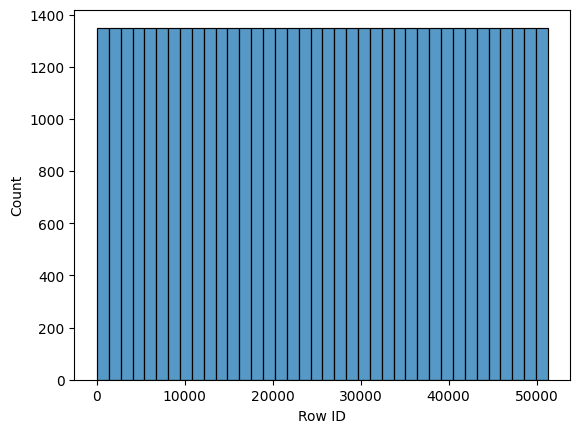

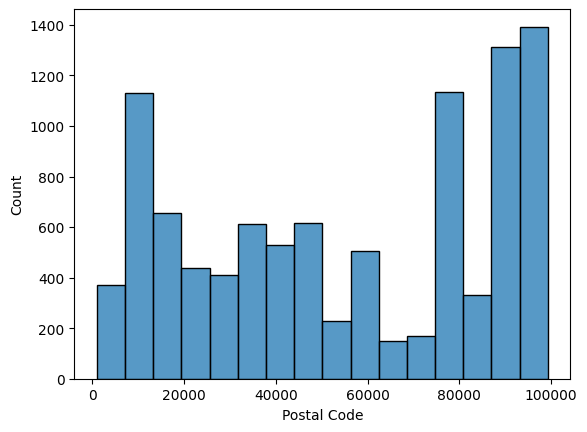

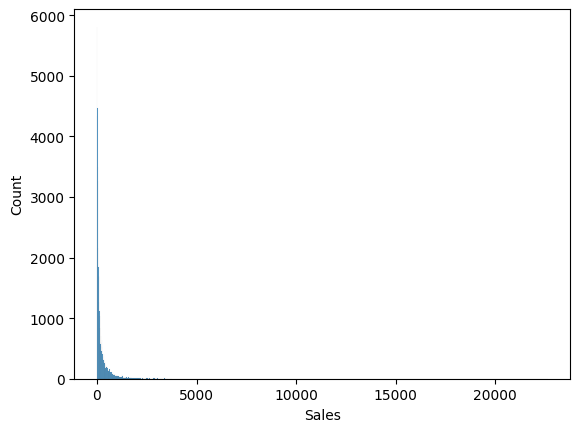

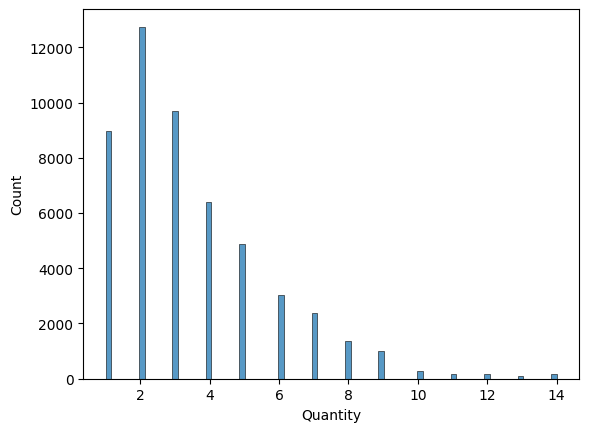

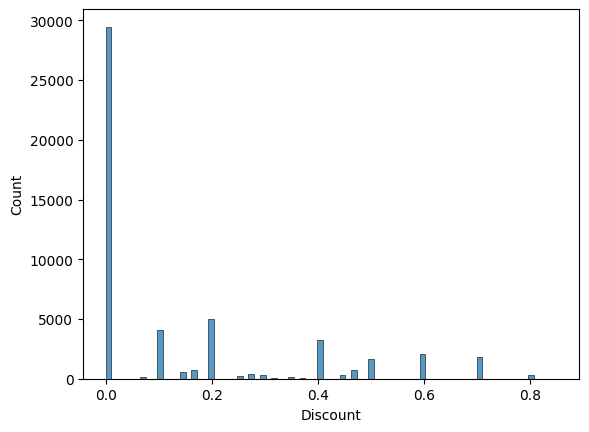

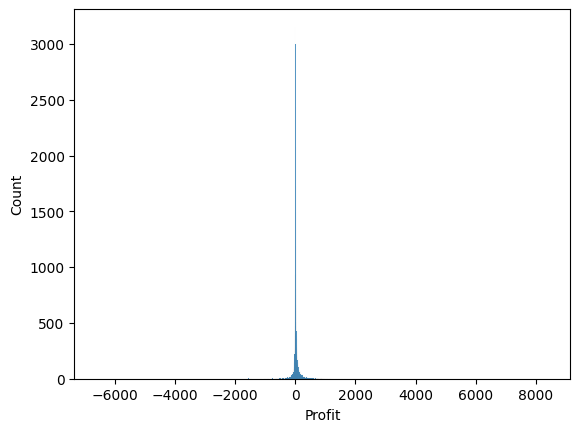

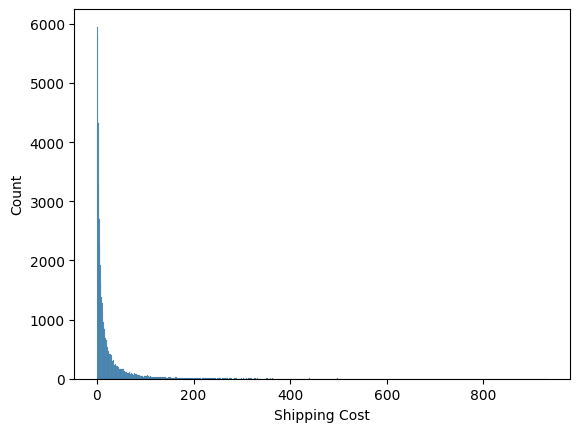

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

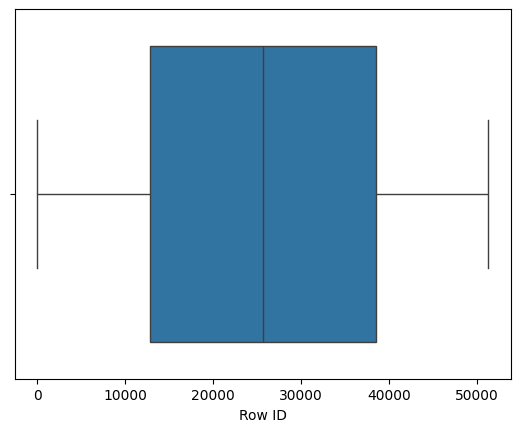

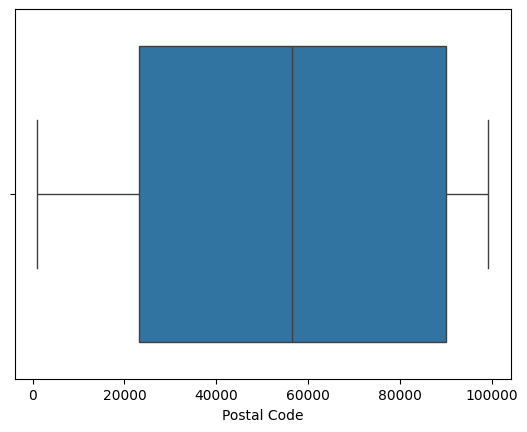

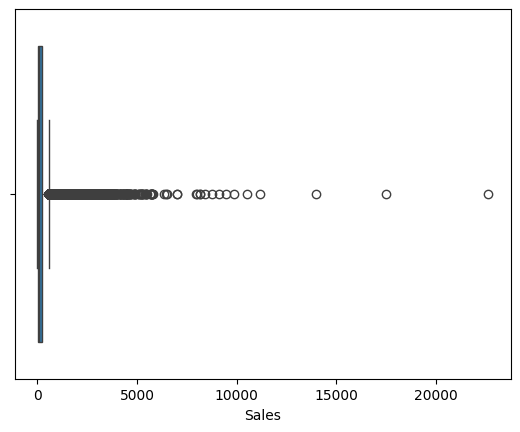

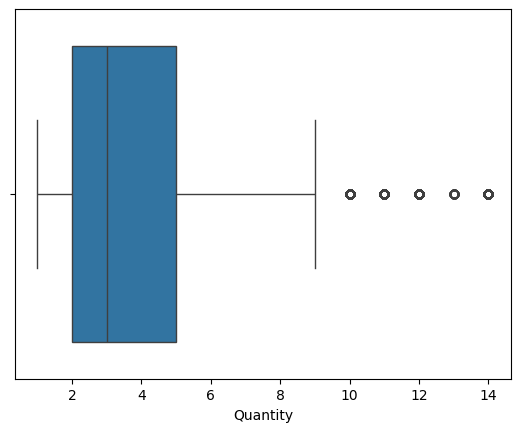

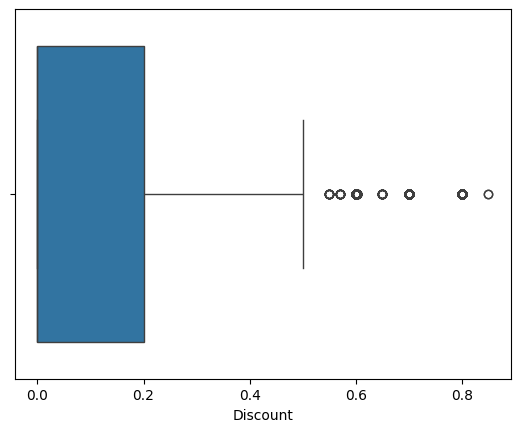

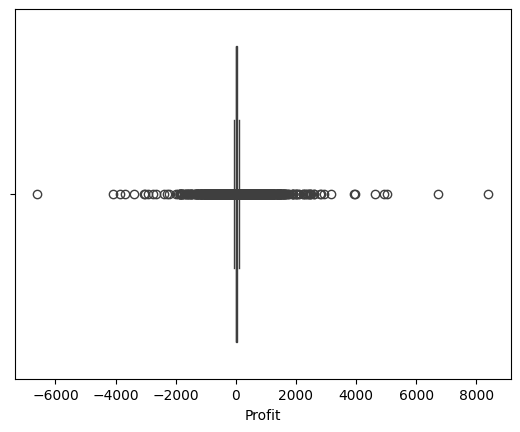

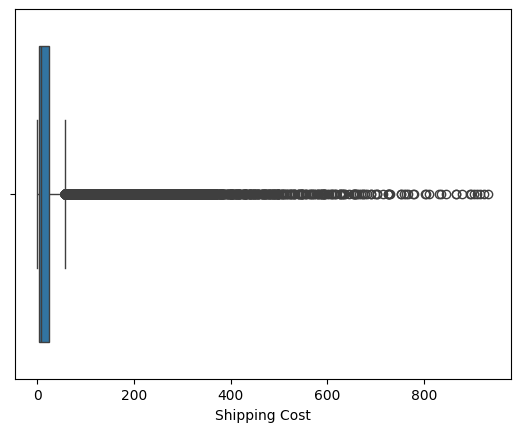

In [ ]:
#Finding outliers
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include='number').columns:
  sns.boxplot(data=df,x=i)
  plt.show()

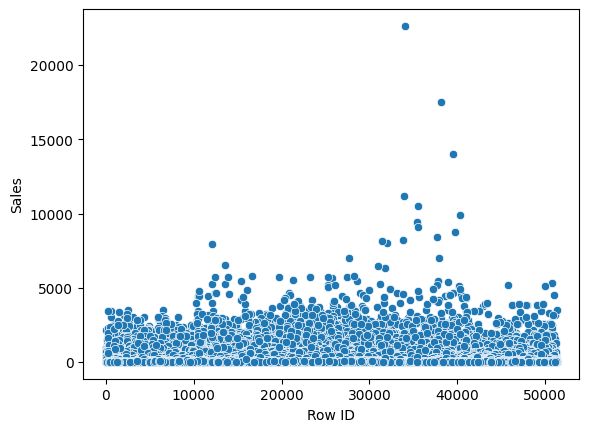

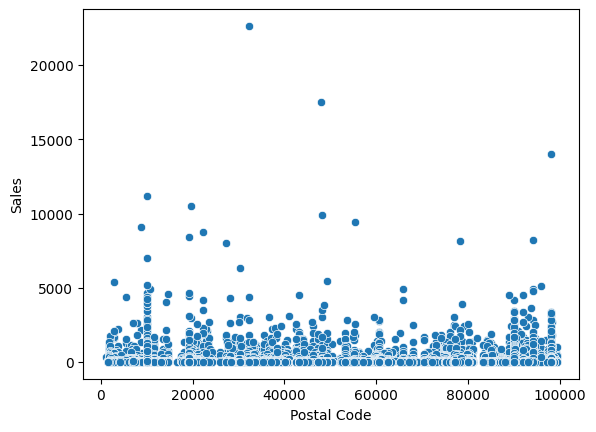

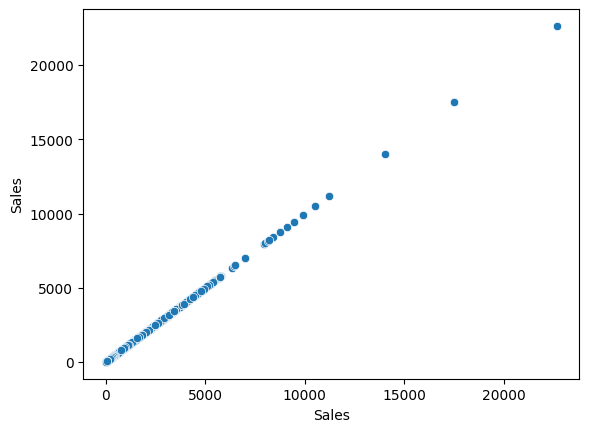

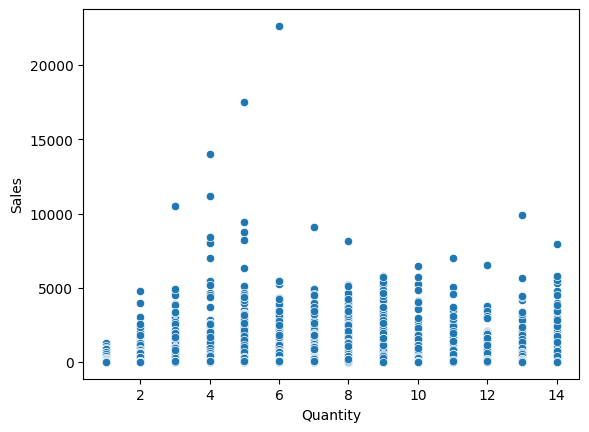

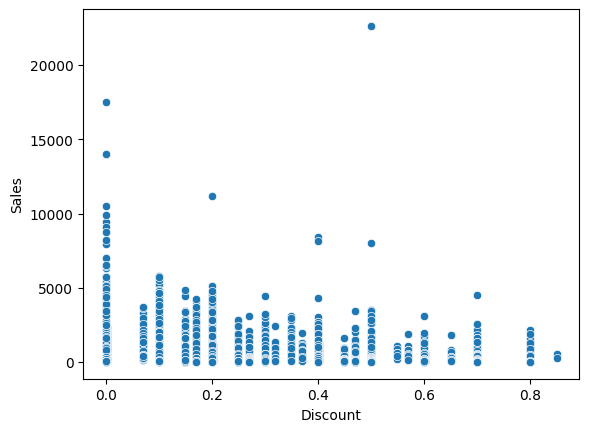

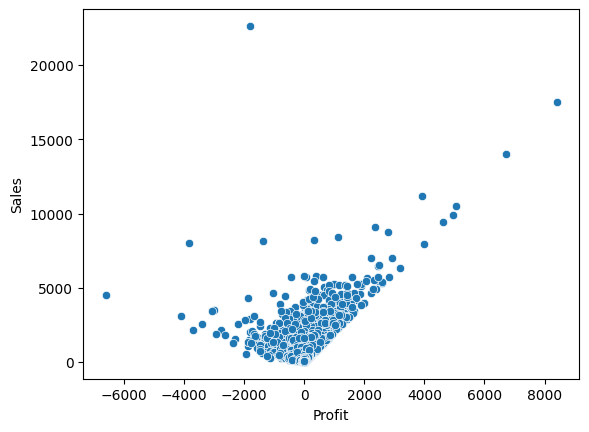

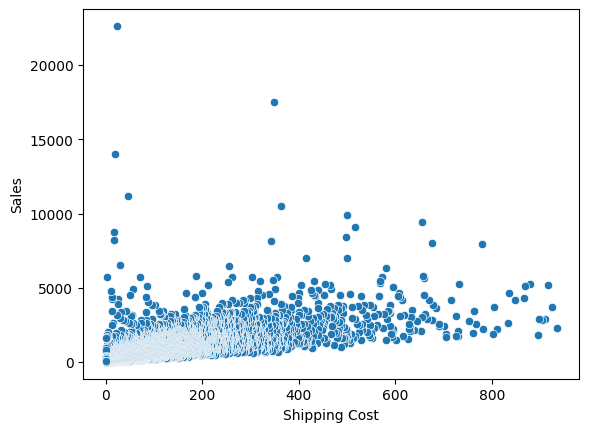

In [ ]:
#visualize the Scatter plot to find the relationship between variables
for i in ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit','Shipping Cost']:
  sns.scatterplot(data=df,x=i,y='Sales')
  plt.show()

In [ ]:
df.select_dtypes(include='number').columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')

In [ ]:
#Finding Correlation
df.select_dtypes(include='number').corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,-0.025449,0.768073,0.272649,-0.079055,0.354441,1.000000


**6.Data Transformation**

In [ ]:
#Data Transformation
df['Unit Price']=df['Sales']/df['Quantity']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit Price
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,329.950
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,412.155
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,575.019
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,578.502
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,354.120


**7.Visualizing Correlation in Heatmap**

<Axes: >

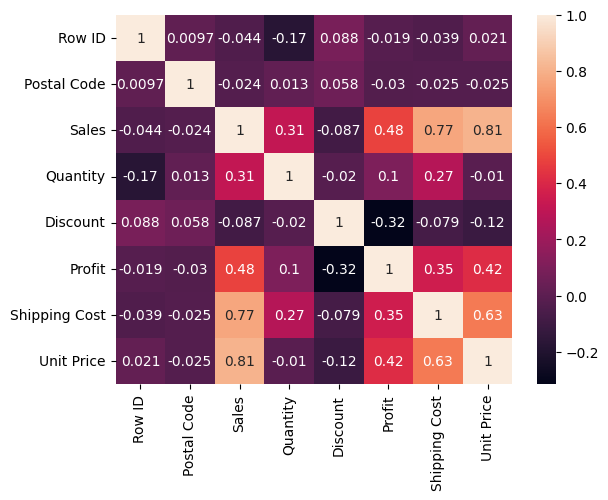

In [ ]:
#Visualizing Correlation in heatmap
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [ ]:
#Missing value treatments
df.drop('Postal Code', axis=1, inplace=True)
df.drop('Discount', axis=1, inplace=True)

In [ ]:
def detect_outliers_modified_zscore(df, column):
    median = df[column].median()
    mad = (df[column] - median).abs().median()
    modified_z_scores = 0.6745 * (df[column] - median) / mad
    outliers = df[modified_z_scores.abs() > 3.5]
    return outliers

# Example usage
outliers_mod_z = detect_outliers_modified_zscore(df, 'Sales')
# Print the detected outliers
print(outliers_mod_z)

       Row ID         Order ID Order Date  Ship Date       Ship Mode  \
0       32298   CA-2012-124891 2012-07-31 2012-07-31        Same Day   
1       26341    IN-2013-77878 2013-02-05 2013-02-07    Second Class   
2       25330    IN-2013-71249 2013-10-17 2013-10-18     First Class   
3       13524  ES-2013-1579342 2013-01-28 2013-01-30     First Class   
4       47221     SG-2013-4320 2013-11-05 2013-11-06        Same Day   
...       ...              ...        ...        ...             ...   
45351   12641  ES-2014-3582654 2014-10-23 2014-10-26     First Class   
46885   49522     SA-2012-4510 2012-06-14 2012-06-18  Standard Class   
47131     268   MX-2014-159282 2014-07-21 2014-07-26  Standard Class   
49027   34692   US-2014-148362 2014-07-02 2014-07-09  Standard Class   
50402   36319   CA-2013-133795 2013-12-19 2013-12-25  Standard Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1

**8.Feature Extraction**

In [ ]:
# Optional: Extract additional time-based features if needed
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
print(df.head())

   Row ID         Order ID Order Date  Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891 2012-07-31 2012-07-31      Same Day    RH-19495   
1   26341    IN-2013-77878 2013-02-05 2013-02-07  Second Class    JR-16210   
2   25330    IN-2013-71249 2013-10-17 2013-10-18   First Class    CR-12730   
3   13524  ES-2013-1579342 2013-01-28 2013-01-30   First Class    KM-16375   
4   47221     SG-2013-4320 2013-11-05 2013-11-06      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

                                        Product Name     Sales Quantity  \
0  Plantronics CS

**9.Saving the cleaned Dataset**

In [ ]:
#Save the cleaned dataset
df.to_csv('New_retail_dataset.csv', index=False)
# Download the file
from google.colab import files
files.download('New_retail_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**PREDICTIVE MODELING MODULE**

**1.Next Purchase prediction with discounts using Random Forest Classifier**

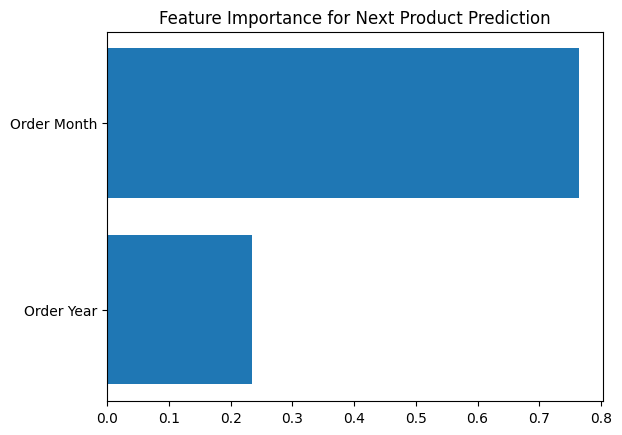

In [ ]:
import matplotlib.pyplot as plt
importances = rf_classifier_product.feature_importances_
plt.barh(features, importances)
plt.title('Feature Importance for Next Product Prediction')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Sort data by 'Customer ID' and 'Order Date' to get a sequential order of purchases
data = data.sort_values(by=['Customer ID', 'Order Date'])

# Define function to get the next product and category a customer will purchase (shift -1 for next purchase)
data['Next Product Name'] = data.groupby('Customer ID')['Product Name'].shift(-1)
data['Next Category'] = data.groupby('Customer ID')['Category'].shift(-1)

# Drop rows where 'Next Product Name' is NaN (since it means there's no future purchase)
data = data.dropna(subset=['Next Product Name', 'Next Category'])

# Select features and target for modeling
features = ['Order Year', 'Order Month']  # You can add more features like RFM metrics
X = data[features]
y_product = data['Next Product Name']  # Target: Next product
y_category = data['Next Category']     # Target: Next category

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_product_train, y_product_test = train_test_split(
    X, y_product, test_size=0.3, random_state=42
)

# Random Forest Classifier for predicting the next product
rf_classifier_product = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_product.fit(X_train, y_product_train)

# Predict next product
y_product_pred = rf_classifier_product.predict(X_test)

# Evaluate the product prediction
product_accuracy = accuracy_score(y_product_test, y_product_pred)
print(f'Product Prediction Accuracy: {product_accuracy * 100:.2f}%')

# Similarly for Category Prediction
X_train, X_test, y_category_train, y_category_test = train_test_split(
    X, y_category, test_size=0.3, random_state=42
)

rf_classifier_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_category.fit(X_train, y_category_train)

# Predict next category
y_category_pred = rf_classifier_category.predict(X_test)

# Evaluate the category prediction
category_accuracy = accuracy_score(y_category_test, y_category_pred)
print(f'Category Prediction Accuracy: {category_accuracy * 100:.2f}%')

# Function to assign promotions and discounts
def assign_discount(product, category):
    # Example discount assignment logic based on product or category
    if category in ['Electronics', 'Accessories']:
        return "20% off", "Special deal on electronics and accessories!"
    elif product in ['Product A', 'Product B']:  # Replace with real product names
        return "15% off", "Limited-time offer on selected products!"
    else:
        return "10% off", "Enjoy a general discount on your next purchase!"

# Predict the next purchase for a specific customer
def predict_next_purchase(customer_id, model_product, model_category, data, features):
    # Filter customer data
    customer_data = data[data['Customer ID'] == customer_id][features]

    # Predict using the RandomForest model
    predicted_product = model_product.predict(customer_data.head(1))
    predicted_category = model_category.predict(customer_data.head(1))

    # Assign discounts and promotions
    discount, promotion = assign_discount(predicted_product[0], predicted_category[0])

    return predicted_product[0], predicted_category[0], discount, promotion

# Example: Predict next purchase for a specific customer
customer_id = 'RH-19495'  # Replace with the actual customer ID
next_product, next_category, discount, promotion = predict_next_purchase(
    customer_id, rf_classifier_product, rf_classifier_category, data, features
)

# Output the prediction, discount, and promotion
print(f"Next predicted product for Customer {customer_id}: {next_product} in Category: {next_category}")
print(f"Assigned Discount: {discount}")
print(f"Promotion: {promotion}")


Product Prediction Accuracy: 0.27%
Category Prediction Accuracy: 61.11%
Next predicted product for Customer RH-19495: Boston Canvas, Fluorescent in Category: Office Supplies
Assigned Discount: 10% off
Promotion: Enjoy a general discount on your next purchase!


**Next Purchase Prediction Dataset**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Sort data by 'Customer ID' and 'Order Date' to get a sequential order of purchases
data = data.sort_values(by=['Customer ID', 'Order Date'])

# Define function to get the next product, category, and sub-category a customer will purchase (shift -1 for next purchase)
data['Next Product Name'] = data.groupby('Customer ID')['Product Name'].shift(-1)
data['Next Category'] = data.groupby('Customer ID')['Category'].shift(-1)
data['Next Sub-Category'] = data.groupby('Customer ID')['Sub-Category'].shift(-1)

# Drop rows where 'Next Product Name' or 'Next Sub-Category' is NaN (since it means there's no future purchase)
data = data.dropna(subset=['Next Product Name', 'Next Category', 'Next Sub-Category'])

# Select features and target for modeling
features = ['Order Year', 'Order Month']  # Can add more features if available
X = data[features]
y_product = data['Next Product Name']  # Target: Next product
y_category = data['Next Category']  # Target: Next category
y_sub_category = data['Next Sub-Category']  # Target: Next sub-category

# Split the dataset into training and testing sets for product prediction
X_train, X_test, y_product_train, y_product_test = train_test_split(
    X, y_product, test_size=0.3, random_state=42
)

# Train Random Forest Classifier for product prediction
rf_classifier_product = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_product.fit(X_train, y_product_train)

# Evaluate product prediction
y_product_pred = rf_classifier_product.predict(X_test)
product_accuracy = accuracy_score(y_product_test, y_product_pred)
print(f'Product Prediction Accuracy: {product_accuracy * 100:.2f}%')

# Split dataset for category prediction
X_train, X_test, y_category_train, y_category_test = train_test_split(
    X, y_category, test_size=0.3, random_state=42
)

# Train Random Forest Classifier for category prediction
rf_classifier_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_category.fit(X_train, y_category_train)

# Evaluate category prediction
y_category_pred = rf_classifier_category.predict(X_test)
category_accuracy = accuracy_score(y_category_test, y_category_pred)
print(f'Category Prediction Accuracy: {category_accuracy * 100:.2f}%')

# Train Random Forest Classifier for sub-category prediction
X_train, X_test, y_sub_category_train, y_sub_category_test = train_test_split(
    X, y_sub_category, test_size=0.3, random_state=42
)

rf_classifier_sub_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_sub_category.fit(X_train, y_sub_category_train)

# Predict next sub-category
y_sub_category_pred = rf_classifier_sub_category.predict(X_test)
sub_category_accuracy = accuracy_score(y_sub_category_test, y_sub_category_pred)
print(f'Sub-Category Prediction Accuracy: {sub_category_accuracy * 100:.2f}%')

# Function to assign promotions and discounts
def assign_discount(category, sub_category):
    if category == 'Technology' and sub_category in ['Phones', 'Accessories']:
        return "20% off", "Exclusive discounts on technology products!"
    elif category == 'Furniture' and sub_category in ['Chairs', 'Tables']:
        return "15% off", "Special offers on furniture items!"
    elif category == 'Office Supplies' and sub_category in ['Binders', 'Paper']:
        return "10% off", "Discounts on office essentials!"
    else:
        return "5% off", "General discount on your next purchase!"

# Predict the next purchase for all customers
predicted_data = data[['Customer ID', 'Product Name', 'Category', 'Sub-Category']].copy()
predicted_data['Next Purchase Product Name'] = rf_classifier_product.predict(X)
predicted_data['Next Category'] = rf_classifier_category.predict(X)
predicted_data['Next Sub-Category'] = rf_classifier_sub_category.predict(X)
predicted_data['Discounts'] = predicted_data.apply(
    lambda row: assign_discount(row['Next Category'], row['Next Sub-Category'])[0], axis=1
)
predicted_data['Promotions'] = predicted_data.apply(
    lambda row: assign_discount(row['Next Category'], row['Next Sub-Category'])[1], axis=1
)

# Save the predicted dataset to a CSV file
output_path = '/content/Next_Purchase_Discounts_Categories_SubCategories.csv'
predicted_data.to_csv(output_path, index=False)
print(f"Predicted data with categories, sub-categories, and discounts saved to {output_path}")


Product Prediction Accuracy: 0.27%
Category Prediction Accuracy: 61.11%
Sub-Category Prediction Accuracy: 11.29%
Predicted data with categories, sub-categories, and discounts saved to /content/Next_Purchase_Discounts_Categories_SubCategories.csv


In [ ]:
# Merge the predicted data (next purchase prediction) with the original dataset on 'Customer ID' and 'Product Name'
merged_predicted_data = pd.merge(predicted_data, data[['Customer ID', 'Product Name', 'Quantity', 'Unit Price']],
                                 on=['Customer ID', 'Product Name'], how='left')

# Define a function to calculate sales after applying discounts
def calculate_sales_after_discount(row):
    """Calculate sales after applying discount."""
    # Extract numeric part of discount string using regex and handle cases with no percentage
    import re
    match = re.search(r'(\d+)', row['Discounts'])
    if match:
        discount_percentage = int(match.group(1))  # Convert extracted numeric part to integer
    else:
        discount_percentage = 0  # If no numeric part found, assume 0% discount

    discount_factor = (100 - discount_percentage) / 100
    sales_after_discount = row['Quantity'] * row['Unit Price'] * discount_factor
    return sales_after_discount

# Apply the sales calculation to each row in the merged data
merged_predicted_data['Sales After Discount'] = merged_predicted_data.apply(calculate_sales_after_discount, axis=1)

# Save the merged data to a CSV file for further analysis
output_path = '/content/Merged_Next_Purchase_Predictions_With_Discounts.csv'
merged_predicted_data.to_csv(output_path, index=False)

print(f"Predicted data with discounts, promotions, and sales after discount saved to {output_path}")

Predicted data with discounts, promotions, and sales after discount saved to /content/Merged_Next_Purchase_Predictions_With_Discounts.csv


In [ ]:
import pandas as pd
import os
from google.colab import files  # Only needed if running in Colab

# Assuming predicted_data and data are already loaded and processed

# Merge the predicted data (next purchase prediction) with the original dataset on 'Customer ID' and 'Product Name'
merged_predicted_data = pd.merge(
    predicted_data,
    data[['Customer ID', 'Product Name', 'Quantity', 'Unit Price']],
    on=['Customer ID', 'Product Name'],
    how='left'
)

# Define a function to calculate sales after applying discounts
def calculate_sales_after_discount(row):
    """Calculate sales after applying discount."""
    # Extract numeric part of discount string using regex
    import re
    match = re.search(r'(\d+)', row['Discounts'])
    discount_percentage = int(match.group(1)) if match else 0
    discount_factor = (100 - discount_percentage) / 100
    return row['Quantity'] * row['Unit Price'] * discount_factor

# Apply the sales calculation to each row in the merged data
merged_predicted_data['Sales After Discount'] = merged_predicted_data.apply(calculate_sales_after_discount, axis=1)

# Save the merged data to a CSV file for further analysis
output_path = '/content/Merged_Next_Purchase_Predictions_With_Discounts.csv'
merged_predicted_data.to_csv(output_path, index=False)

# Verify file creation and prompt download
if os.path.exists(output_path):
    print(f"File successfully created: {output_path}")
    # Prompt download if in Colab
    files.download(output_path)
else:
    print("File could not be saved. Please check your code and file path.")


File successfully created: /content/Merged_Next_Purchase_Predictions_With_Discounts.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

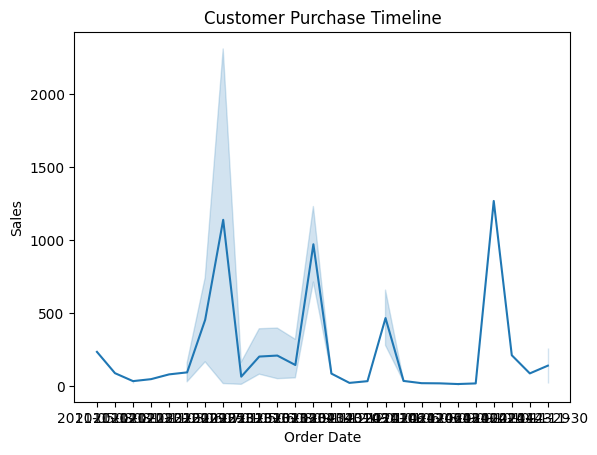

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting purchases over time for a specific customer
customer_orders = data[data['Customer ID'] == 'RH-19495']  # Example customer
sns.lineplot(x='Order Date', y='Sales', data=customer_orders)
plt.title('Customer Purchase Timeline')
plt.show()


In [ ]:
!pip install -U scikit-learn  # Upgrade scikit-learn to the latest version

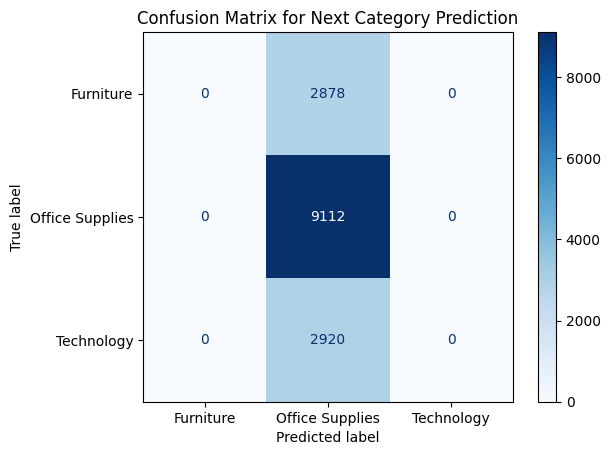

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Import ConfusionMatrixDisplay instead of plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Plot confusion matrix for category prediction using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    rf_classifier_category, X_test, y_category_test, cmap=plt.cm.Blues
)
disp.ax_.set_title('Confusion Matrix for Next Category Prediction')
plt.show()

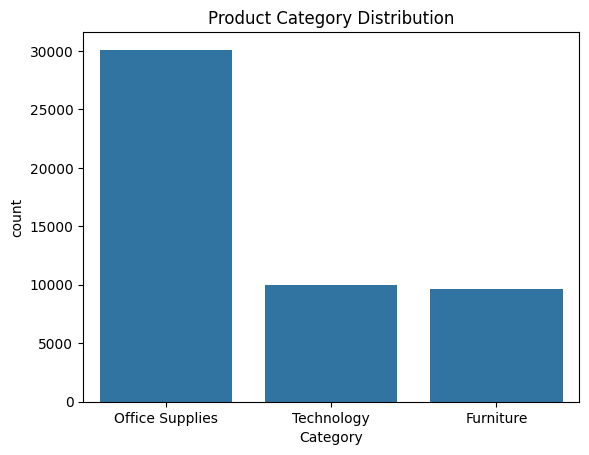

In [ ]:
sns.countplot(x='Category', data=data)
plt.title('Product Category Distribution')
plt.show()


**2.Churn Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset.csv',encoding='latin-1')

# Data Preprocessing
df['Churn'] = df['Sales'].apply(lambda x: 1 if x < 50 else 0)  # Example rule for churn

# Ensure Customer ID is a string
df['Customer ID'] = df['Customer ID'].astype(str)

# Select features and target variable
features = df[['Customer ID', 'Quantity', 'Unit Price', 'Sales']]
target = df['Churn']

# Convert 'Customer ID' to numerical using LabelEncoder
label_encoder = LabelEncoder() # Initialize LabelEncoder
features['Customer ID Encoded'] = label_encoder.fit_transform(features['Customer ID']) # Create a new column with encoded values
features = features.drop('Customer ID', axis=1) # Drop the original 'Customer ID' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Function to get overall churn probability for all customers
def overall_churn_probability():
    # Predict probabilities for the test set
    churn_probabilities = logistic_model.predict_proba(X_test)[:, 1]
    overall_churn_rate = churn_probabilities.mean()
    print(f"Overall probability of churn across all customers: {overall_churn_rate * 100:.2f}%")

# Function to get churn probability for a specific customer ID
def churn_probability_for_customer():
    # Print unique customer IDs for debugging
    print("Available Customer IDs in the dataset:")
    print(df['Customer ID'].unique())

    # Prompt the user to enter the customer ID
    customer_id = input("Please enter the Customer ID: ")

    # Ensure the customer ID is in the correct format
    customer_data = df[df['Customer ID'] == str(customer_id)]  # Ensure comparison with string

    # If customer not found in the dataset
    if customer_data.empty:
        print(f"Customer ID {customer_id} not found.")
        return

    # Prepare the features for the specific customer
    customer_features = customer_data[['Quantity', 'Unit Price', 'Sales']]
    customer_features['Customer ID Encoded'] = label_encoder.transform(customer_data['Customer ID']) # Encode 'Customer ID' using the same LabelEncoder

    # Predict churn probability
    churn_probability = logistic_model.predict_proba(customer_features)[:, 1]

    print(f"Churn probability for Customer ID {customer_id}: {round(churn_probability[0] * 100, 2)}%")

# Example usage
overall_churn_probability()  # Get overall churn probability
churn_probability_for_customer()  # Now this function will prompt for Customer ID

Overall probability of churn across all customers: 36.71%
Available Customer IDs in the dataset:
['RH-19495' 'JR-16210' 'CR-12730' ... 'RC-9825' 'MG-7890' 'ZC-11910']


**RECOMMENDATION ENGINE MODULE**

**1.Personalized Promotions and Discounts Using User Based Collaborative Filtering**





In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=adfdbe9a411ba371d61a558d9d11c798a01fa93dcca6314ce9152bd22c4d835a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')  # Update with your file path

# Filter the relevant columns for collaborative filtering
# Added 'Quantity' as a proxy for rating
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# User-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': True  # User-based collaborative filtering
}
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Function to calculate discounts based on predicted ratings
def calculate_discount(rating, max_rating):
    """Calculate discount percentage based on predicted rating."""
    if rating > 0.8 * max_rating:
        return 30  # 30% discount for highly recommended products
    elif rating > 0.6 * max_rating:
        return 20  # 20% discount for moderately recommended products
    else:
        return 10  # 10% discount for less recommended products

# Function to recommend products and provide discounts for a given customer
def get_user_based_recommendations_with_discounts(customer_id, k=15):
    # Get customer name from Customer ID
    customer_name = df[df['Customer ID'] == customer_id]['Customer Name'].values[0]

    # Find all products the customer has not yet interacted with
    customer_purchases = df[df['Customer ID'] == customer_id]['Product ID'].unique()
    all_products = df['Product ID'].unique()
    products_to_recommend = list(set(all_products) - set(customer_purchases))

    # Predict ratings for all products the customer has not interacted with
    predictions = []
    for product_id in products_to_recommend:
        pred = user_based_model.predict(customer_id, product_id)
        predictions.append((product_id, pred.est))  # Product ID and estimated rating

    # Sort by predicted rating in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top k recommendations
    top_k_recommendations = predictions[:k]

    # Display recommended products with percentage probability and discount
    recommendations = []
    max_quantity = df['Quantity'].max()  # Use this for scaling discount
    for product_id, rating in top_k_recommendations:
        product_name = df[df['Product ID'] == product_id]['Product Name'].values[0]
        percentage = round((rating / max_quantity) * 100, 2)  # Convert rating to percentage
        discount = calculate_discount(rating, max_quantity)  # Calculate discount based on rating
        recommendations.append({
            'Product ID': product_id,
            'Product Name': product_name,
            'Recommendation Probability (%)': percentage,
            'Discount (%)': discount
        })

    return customer_name, recommendations

# Example: Enter a customer ID to get recommendations and discounts
customer_id = 'AH-465'  # Replace with the desired Customer ID
customer_name, recommended_products = get_user_based_recommendations_with_discounts(customer_id)

# Output the result
print(f"Customer Name: {customer_name}")
print("Recommended Products with Discounts:")
for rec in recommended_products:
    print(f"Product ID: {rec['Product ID']}, Product Name: {rec['Product Name']}, "
          f"Probability: {rec['Recommendation Probability (%)']}%, Discount: {rec['Discount (%)']}%")

# Save Recommendations and Discounts for All Customers
unique_customers = df['Customer ID'].unique()
recommendations_list = []

for customer_id in unique_customers:
    # Get recommendations and discounts for each customer
    customer_name, recommended_products = get_user_based_recommendations_with_discounts(customer_id)

    # Collect the recommended product IDs and discounts as a comma-separated string
    recommended_product_ids = ', '.join([f"{rec['Product ID']} (Discount: {rec['Discount (%)']}%)"
                                         for rec in recommended_products])

    # Append the customer ID and the recommended products with discounts to the list
    recommendations_list.append({
        'Customer ID': customer_id,
        'Recommended Products with Discounts': recommended_product_ids
    })

# Convert the list of dictionaries to a DataFrame
recommendations_df = pd.DataFrame(recommendations_list)

# Save the DataFrame to a CSV file
recommendations_df.to_csv('recommended_products_with_discounts.csv', index=False)
print("Recommendations with discounts have been saved to 'recommended_products_with_discounts.csv'")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Customer Name: Amy Hunt
Recommended Products with Discounts:
Product ID: OFF-OIC-10004536, Product Name: OIC Thumb Tacks, Assorted Sizes, Probability: 85.71%, Discount: 30%
Product ID: OFF-ADV-10003050, Product Name: Advantus Rubber Bands, Bulk Pack, Probability: 85.71%, Discount: 30%
Product ID: OFF-AVE-10004312, Product Name: Avery Index Tab, Clear, Probability: 71.43%, Discount: 20%
Product ID: OFF-ELD-10000124, Product Name: Eldon Trays, Single Width, Probability: 57.14%, Discount: 10%
Product ID: TEC-CIS-10001938, Product Name: Cisco Audio Dock, VoIP, Probability: 57.14%, Discount: 10%
Product ID: FUR-OFF-10001224, Product Name: Office Star Swivel Stool, Red, Probability: 57.14%, Discount: 10%
Product ID: FUR-DEF-10003551, Product Name: Deflect-O Photo Frame, Erganomic, Probability: 57.14%, Discount: 10%
Product ID: FUR-ELD-10000963, Product Name: Eldon Stacking Tray, Durable, Probability: 57.14%, Discount

**User based preference downloaded dataset**

In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset (3).csv', encoding='latin-1')  # Update with your file path

# Filter the relevant columns for collaborative filtering
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# User-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': True  # User-based collaborative filtering
}
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Function to assign discounts and promotions based on predicted ratings
def assign_discount_and_promotion(rating, max_rating):
    """Assign discounts and promotions based on rating."""
    if rating > 0.8 * max_rating:
        return 30, "Special Promotion: 30% Off on Top Picks!"
    elif rating > 0.6 * max_rating:
        return 20, "Promotion: 20% Off on Recommended Items!"
    else:
        return 10, "General Discount: 10% Off!"

# Function to recommend products and provide discounts/promotions for a given customer
def get_user_recommendations_with_discounts(customer_id, k=5):
    # Get customer data
    customer_data = df[df['Customer ID'] == customer_id]
    customer_purchases = customer_data['Product ID'].unique()
    all_products = df['Product ID'].unique()
    products_to_recommend = list(set(all_products) - set(customer_purchases))

    # Predict ratings for all products not interacted with
    predictions = []
    for product_id in products_to_recommend:
        pred = user_based_model.predict(customer_id, product_id)
        predictions.append((product_id, pred.est))  # Product ID and estimated rating

    # Sort by predicted rating
    predictions.sort(key=lambda x: x[1], reverse=True)
    top_k_recommendations = predictions[:k]

    # Create recommendations with discounts/promotions
    max_quantity = df['Quantity'].max()
    recommendations = []
    for product_id, rating in top_k_recommendations:
        product_info = df[df['Product ID'] == product_id].iloc[0]
        discount, promotion = assign_discount_and_promotion(rating, max_quantity)
        recommendations.append({
            'Customer ID': customer_id,
            'Product ID': product_id,
            'Product Name': customer_data.iloc[0]['Product Name'],
            'Recommended Product Name': product_info['Product Name'],
            'Category': product_info['Category'],
            'Sub-Category': product_info['Sub-Category'],
            'Discounts': f'{discount}%',
            'Promotions': promotion
        })
    return recommendations

# Generate recommendations for all unique customers
all_recommendations = []

unique_customers = df['Customer ID'].unique()  # Get all unique Customer IDs
for customer_id in unique_customers:
    recommendations = get_user_recommendations_with_discounts(customer_id, k=5)
    all_recommendations.extend(recommendations)  # Collect all recommendations

# Convert the list of recommendations to a DataFrame
recommendations_df = pd.DataFrame(all_recommendations)

# Save the DataFrame to a CSV file
recommendations_df.to_csv('recommended_products_with_discounts.csv', index=False)
print("Recommendations with discounts have been saved to 'recommended_products_with_discounts.csv'")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Recommendations with discounts have been saved to 'recommended_products_with_discounts.csv'


In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset (3).csv', encoding='latin-1')  # Update with your file path

# Filter the relevant columns for collaborative filtering
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# User-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': True  # User-based collaborative filtering
}
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Function to assign discounts and promotions based on predicted ratings
def assign_discount_and_promotion(rating, max_rating):
    """Assign discounts and promotions based on rating."""
    if rating > 0.8 * max_rating:
        return 30, "Special Promotion: 30% Off on Top Picks!"
    elif rating > 0.6 * max_rating:
        return 20, "Promotion: 20% Off on Recommended Items!"
    else:
        return 10, "General Discount: 10% Off!"

# Function to recommend products and provide discounts/promotions for a given customer
def get_user_recommendations_with_discounts(customer_id, k=5):
    customer_data = df[df['Customer ID'] == customer_id]
    customer_purchases = customer_data['Product ID'].unique()
    all_products = df['Product ID'].unique()
    products_to_recommend = list(set(all_products) - set(customer_purchases))

    predictions = []
    for product_id in products_to_recommend:
        pred = user_based_model.predict(customer_id, product_id)
        predictions.append((product_id, pred.est))  # Product ID and estimated rating

    predictions.sort(key=lambda x: x[1], reverse=True)
    top_k_recommendations = predictions[:k]

    max_quantity = df['Quantity'].max()
    recommendations = []
    for product_id, rating in top_k_recommendations:
        product_info = df[df['Product ID'] == product_id].iloc[0]
        discount, promotion = assign_discount_and_promotion(rating, max_quantity)
        recommendations.append({
            'Customer ID': customer_id,
            'Product ID': product_id,
            'Product Name': customer_data.iloc[0]['Product Name'],
            'Recommended Product Name': product_info['Product Name'],
            'Category': product_info['Category'],
            'Sub-Category': product_info['Sub-Category'],
            'Discounts': f'{discount}%',
            'Promotions': promotion,
            'Recommendation Probability (%)': round(rating * 100 / max_quantity, 2),
            'Quantity': product_info['Quantity'],
            'Unit Price': product_info['Unit Price']
        })
    return recommendations

# Generate recommendations for all unique customers
all_recommendations = []
unique_customers = df['Customer ID'].unique()
for customer_id in unique_customers:
    recommendations = get_user_recommendations_with_discounts(customer_id, k=5)
    all_recommendations.extend(recommendations)

# Convert the list of recommendations to a DataFrame
recommendations_df = pd.DataFrame(all_recommendations)

# Calculate "Sales After Discount"
recommendations_df['Sales After Discount'] = recommendations_df.apply(
    lambda row: row['Quantity'] * row['Unit Price'] * (1 - int(row['Discounts'].replace('%', '')) / 100), axis=1
)

# Save the final formatted DataFrame
output_path = '/content/Formatted_Recommendations.csv'
recommendations_df.to_csv(output_path, index=False)
print(f"Formatted dataset saved to {output_path}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Formatted dataset saved to /content/Formatted_Recommendations.csv


In [ ]:
final_data = merged_data[
    ['Customer ID', 'Product ID', 'Product Name', 'Recommended Product Name',
     'Category', 'Sub-Category', 'Discounts', 'Promotions',
     'Recommendation Probability (%)', 'Quantity', 'Unit Price', 'Sales After Discount']
]

In [ ]:
# Assuming recommendations_df for user-based recommendations contains 'Customer ID', 'Product ID', and other necessary columns
# Merge the user-based recommendations with the original dataset 'df' on 'Product ID'
merged_user_df = pd.merge(recommendations_df, df[['Product ID', 'Quantity', 'Unit Price']], on='Product ID', how='left')

# Ensure necessary columns exist
if 'Unit Price' not in merged_user_df.columns:
    raise ValueError("Unit Price column is missing in the merged DataFrame.")

# Define a function to calculate sales after applying discounts
def calculate_sales_after_discount(row):
    """Calculate sales after applying discount."""
    # Apply discount to the unit price based on the discount percentage
    discount_percentage = int(row['Discounts'].replace('%', ''))  # Convert discount to integer
    discount_factor = (100 - discount_percentage) / 100
    sales_after_discount = row['Quantity'] * row['Unit Price'] * discount_factor
    return sales_after_discount

# Apply the sales calculation to each row
merged_user_df['Sales After Discount'] = merged_user_df.apply(calculate_sales_after_discount, axis=1)

# You can now create visualizations or further analysis with the merged DataFrame
# Example: Save to CSV to view the results
merged_user_df.to_csv('merged_user_recommendations_with_sales.csv', index=False)

# Print a sample of the merged DataFrame with calculated sales
print(merged_user_df[['Customer ID', 'Product ID', 'Recommended Product Name', 'Discounts', 'Sales After Discount']].head())


  Customer ID       Product ID            Recommended Product Name Discounts  \
0    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
1    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
2    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
3    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
4    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   

   Sales After Discount  
0             1229.1912  
1             1365.7680  
2              386.9676  
3              409.7304  
4              303.5040  


In [ ]:
# Import necessary libraries for accuracy calculation
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Filter the relevant columns for collaborative filtering
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# User-based Collaborative Filtering model
sim_options = {
    'name': 'cosine',
    'user_based': True  # User-based collaborative filtering
}
user_based_model = KNNBasic(sim_options=sim_options)
user_based_model.fit(trainset)

# Test the model on the test set
predictions = user_based_model.test(testset)

# Calculate accuracy metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Output the accuracy metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6446
MAE:  1.9933
RMSE: 2.6445683632683266
MAE: 1.9932731479585568


**2.Personalized Promotions and Discounts Using Item Based Collaborative Filtering**

In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Filter the relevant columns for collaborative filtering
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Item-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based collaborative filtering
}
item_based_model = KNNBasic(sim_options=sim_options)
item_based_model.fit(trainset)

# Function to generate discounts based on recommendation probability
def get_discount(probability):
    if probability > 70:
        return "20% off"
    elif 50 <= probability <= 70:
        return "10% off"
    else:
        return "5% off"

# Function to recommend products and provide personalized discounts/promotions
def get_item_based_recommendations_with_promotions(customer_id, k=20):
    # Get customer name from Customer ID
    customer_name = df[df['Customer ID'] == customer_id]['Customer Name'].values[0]

    # Find all products the customer has interacted with
    customer_purchases = df[df['Customer ID'] == customer_id]['Product ID'].unique()

    # Predict ratings for products the customer has already interacted with (item similarity-based recommendations)
    recommendations = []
    for product_id in customer_purchases:
        try:
            # Convert raw product ID to inner ID
            inner_id = item_based_model.trainset.to_inner_iid(product_id)

            neighbors = item_based_model.get_neighbors(inner_id, k=k)  # Get k nearest neighbors (similar items)

            for neighbor in neighbors:
                # Convert inner ID back to raw ID
                neighbor_raw_id = item_based_model.trainset.to_raw_iid(neighbor)

                # Avoid recommending already purchased products
                if neighbor_raw_id not in customer_purchases:
                    predicted_rating = item_based_model.predict(customer_id, neighbor_raw_id).est
                    product_name = df[df['Product ID'] == neighbor_raw_id]['Product Name'].values[0]

                    # Calculate recommendation probability
                    percentage = round((predicted_rating / df['Quantity'].max()) * 100, 2)

                    # Get the appropriate discount based on the recommendation probability
                    discount = get_discount(percentage)

                    # Add the product, its discount, and recommendation probability
                    recommendations.append({
                        'Product ID': neighbor_raw_id,
                        'Product Name': product_name,
                        'Recommendation Probability (%)': percentage,
                        'Discount': discount
                    })
        except ValueError:
            pass  # Handle products not in training set

    # Sort by predicted rating in descending order and get top k recommendations
    recommendations = sorted(recommendations, key=lambda x: x['Recommendation Probability (%)'], reverse=True)[:k]

    return customer_name, recommendations

# Example: Enter a customer ID to get recommendations with promotions
customer_id = 'AH-465'  # Replace with the desired Customer ID
customer_name, recommended_products = get_item_based_recommendations_with_promotions(customer_id)

# Output the result
print(f"Customer Name: {customer_name}")
print("Recommended Products with Promotions:")
for rec in recommended_products:
    print(f"Product ID: {rec['Product ID']}, Product Name: {rec['Product Name']}, "
          f"Probability: {rec['Recommendation Probability (%)']}%, Discount: {rec['Discount']}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Customer Name: Amy Hunt
Recommended Products with Promotions:
Product ID: OFF-BIC-10002942, Product Name: BIC Highlighters, Easy-Erase, Probability: 24.83%, Discount: 5% off
Product ID: OFF-EAT-10001933, Product Name: Eaton Cards & Envelopes, Recycled, Probability: 24.83%, Discount: 5% off
Product ID: OFF-BOS-10002041, Product Name: Boston Highlighters, Water Color, Probability: 24.83%, Discount: 5% off
Product ID: OFF-AVE-10000432, Product Name: Avery Index Tab, Clear, Probability: 24.83%, Discount: 5% off
Product ID: OFF-CAR-10002054, Product Name: Cardinal Hole Reinforcements, Economy, Probability: 24.83%, Discount: 5% off
Product ID: TEC-NOK-10001219, Product Name: Nokia Signal Booster, Cordless, Probability: 24.83%, Discount: 5% off
Product ID: TEC-CIS-10002598, Product Name: Cisco Audio Dock, with Caller ID, Probability: 24.83%, Discount: 5% off
Product ID: OFF-STA-10002719, Product Name: Stanley Pencil S

**Item Based discounts Dataset**


In [ ]:
# Import necessary libraries
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Ensure all necessary columns exist
required_columns = {'Customer ID', 'Product ID', 'Quantity', 'Product Name', 'Category', 'Sub-Category'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset is missing required columns. Missing columns: {required_columns - set(df.columns)}")

# Filter relevant columns for collaborative filtering
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Item-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based collaborative filtering
}
item_based_model = KNNBasic(sim_options=sim_options)
item_based_model.fit(trainset)

# Function to assign discounts and promotions based on recommendation probability
def assign_discount_and_promotion(probability):
    """Assign discounts and promotions based on recommendation probability."""
    if probability > 70:
        return "20%", "Special Promotion: 20% Off on Top Picks!"
    elif 50 <= probability <= 70:
        return "10%", "Promotion: 10% Off on Recommended Items!"
    else:
        return "5%", "General Discount: 5% Off!"

# Function to recommend products and provide personalized discounts/promotions
def get_item_based_recommendations_with_promotions(customer_id, k=20):
    customer_data = df[df['Customer ID'] == customer_id]
    if customer_data.empty:
        raise ValueError(f"No data found for Customer ID: {customer_id}")

    customer_purchases = customer_data['Product ID'].unique()

    recommendations = []
    for product_id in customer_purchases:
        try:
            # Convert product_id to string to ensure compatibility with Surprise
            inner_id = item_based_model.trainset.to_inner_iid(str(product_id))
            neighbors = item_based_model.get_neighbors(inner_id, k=k)

            for neighbor in neighbors:
                neighbor_raw_id = item_based_model.trainset.to_raw_iid(neighbor)

                if neighbor_raw_id not in customer_purchases:
                    predicted_rating = item_based_model.predict(customer_id, neighbor_raw_id).est
                    product_info = df[df['Product ID'] == neighbor_raw_id].iloc[0]

                    percentage = round((predicted_rating / df['Quantity'].max()) * 100, 2)
                    discount, promotion = assign_discount_and_promotion(percentage)

                    recommendations.append({
                        'Customer ID': customer_id,
                        'Product ID': neighbor_raw_id,
                        'Product Name': product_info['Product Name'],
                        'Recommended Product Name': product_info['Product Name'],
                        'Category': product_info['Category'],
                        'Sub-Category': product_info['Sub-Category'],
                        'Discounts': discount,
                        'Promotions': promotion,
                        'Recommendation Probability (%)': percentage
                    })
        except ValueError:
            continue

    return sorted(recommendations, key=lambda x: x['Recommendation Probability (%)'], reverse=True)[:k]

# Generate recommendations for all unique customers
all_recommendations = []

unique_customers = df['Customer ID'].unique()  # Get all unique Customer IDs
for customer_id in unique_customers:
    recommendations = get_item_based_recommendations_with_promotions(customer_id, k=5)
    all_recommendations.extend(recommendations)  # Collect all recommendations

# Convert the list of recommendations to a DataFrame
recommendations_df = pd.DataFrame(all_recommendations)

# Save the DataFrame to a CSV file
recommendations_df.to_csv('item_based_recommended_products_with_promotions.csv', index=False)
print("Recommendations with promotions have been saved to 'item_based_recommended_products_with_promotions.csv'")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Recommendations with promotions have been saved to 'item_based_recommended_products_with_promotions.csv'


In [ ]:
# Merge the recommendations_df with the original dataset df on Product ID
merged_df = pd.merge(recommendations_df, df[['Product ID', 'Quantity', 'Unit Price']], on='Product ID', how='left')

# Ensure necessary columns exist
if 'Unit Price' not in merged_df.columns:
    raise ValueError("Unit Price column is missing in the merged DataFrame.")

# Define a function to calculate sales after applying discounts
def calculate_sales_after_discount(row):
    """Calculate sales after applying discount."""
    # Apply discount to the unit price based on the discount percentage
    discount_percentage = int(row['Discounts'].replace('%', ''))  # Convert discount to integer
    discount_factor = (100 - discount_percentage) / 100
    sales_after_discount = row['Quantity'] * row['Unit Price'] * discount_factor
    return sales_after_discount

# Apply the sales calculation to each row
merged_df['Sales After Discount'] = merged_df.apply(calculate_sales_after_discount, axis=1)

# You can now create visualizations or further analysis with the merged DataFrame
# Example: Save to CSV to view the results
merged_df.to_csv('merged_recommendations_with_sales.csv', index=False)

# Print a sample of the merged DataFrame with calculated sales
print(merged_df[['Customer ID', 'Product ID', 'Recommended Product Name', 'Discounts', 'Sales After Discount']].head())


  Customer ID       Product ID            Recommended Product Name Discounts  \
0    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
1    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
2    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
3    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   
4    RH-19495  TEC-CO-10004147  Brother Fax and Copier, High-Speed       20%   

   Sales After Discount  
0             1229.1912  
1             1365.7680  
2              386.9676  
3              409.7304  
4              303.5040  


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357269 sha256=83574d8d079ab7b7603a1c13746e5352de784bc0854c672a5aad83199ac6da85
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries for accuracy calculation
from surprise import accuracy
from surprise.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Filter the relevant columns for collaborative filtering
df_filtered = df[['Customer ID', 'Product ID', 'Quantity']]

# Define a reader object for Surprise
reader = Reader(rating_scale=(1, df['Quantity'].max()))

# Load data into Surprise dataset
data = Dataset.load_from_df(df_filtered, reader)

# Split the dataset into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Item-based Collaborative Filtering
sim_options = {
    'name': 'cosine',
    'user_based': False  # Item-based collaborative filtering
}
item_based_model = KNNBasic(sim_options=sim_options)
item_based_model.fit(trainset)

# Test the model on the test set
predictions = item_based_model.test(testset)

# Calculate accuracy metrics
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Output the accuracy metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.6169
MAE:  1.9738
RMSE: 2.616857754705364
MAE: 1.973813255139044


**PERSONALIZED PROMOTIONS & DISCOUNTS MODULE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
df = pd.read_csv('/content/New_retail_dataset.csv', encoding='latin-1')

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate total sales per customer and per category
category_sales = df.groupby(['Customer ID', 'Customer Name', 'Category']) \
    .agg(Total_Sales=('Sales', 'sum'), Total_Quantity=('Quantity', 'sum')) \
    .reset_index()

# Convert 'Customer ID' to string
category_sales['Customer ID'] = category_sales['Customer ID'].astype(str)

# Define discount rules for training based on categories
# We define different types of discounts (percentage, flat rate, loyalty)
category_discount_map = {
    'Technology': {'Type': 'percentage', 'Value': 15},  # 15% discount for Technology
    'Furniture': {'Type': 'flat', 'Value': 20},         # Flat $20 discount for Furniture
    'Office Supplies': {'Type': 'loyalty', 'Value': 5}  # Loyalty: $5 off for Office Supplies
}

# Assign discount types and values to the dataset
category_sales['Discount_Type'] = category_sales['Category'].map(lambda x: category_discount_map[x]['Type'])
category_sales['Discount_Value'] = category_sales['Category'].map(lambda x: category_discount_map[x]['Value'])

# Define features and target for training
X = category_sales[['Total_Sales', 'Total_Quantity']]  # Input features
y = category_sales['Discount_Value']  # Target variable (Discount Value)

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Predict the discount for all customers in the dataset
category_sales['Predicted_Discount_Value'] = gbr.predict(X)

# Calculate the discount amount based on predicted discount values and discount types
def calculate_discount(row):
    if row['Discount_Type'] == 'percentage':
        return row['Total_Sales'] * row['Predicted_Discount_Value'] / 100
    elif row['Discount_Type'] == 'flat':
        return row['Predicted_Discount_Value']
    elif row['Discount_Type'] == 'loyalty':
        return min(row['Total_Sales'], row['Predicted_Discount_Value'])  # Cap loyalty discount to total sales
    else:
        return 0

category_sales['Discount_Amount'] = category_sales.apply(calculate_discount, axis=1)

# Print available customer IDs for user reference
print("Available Customer IDs:")
print(category_sales['Customer ID'].unique())

# Input customer ID from the user
customer_id_input = input("\nEnter Customer ID: ").strip()

# Filter data for the specified customer ID
customer_data = category_sales[category_sales['Customer ID'] == customer_id_input]

# Check if customer data exists
if not customer_data.empty:
    # Print results for the specified customer
    print(f"\nCustomer ID: {customer_id_input}")
    for index, row in customer_data.iterrows():
        print(f" - Name: {row['Customer Name']}")
        print(f" - Category: {row['Category']}")
        print(f" - Total Sales: ${row['Total_Sales']:.2f}")
        print(f" - Total Quantity: {row['Total_Quantity']}")
        print(f" - Predicted Discount Type: {row['Discount_Type']}")
        print(f" - Predicted Discount Value: {row['Predicted_Discount_Value']:.2f}")
        print(f" - Discount Amount: ${row['Discount_Amount']:.2f}\n")
else:
    print(f"No data found for Customer ID: {customer_id_input}")


Mean Squared Error: 13.85
Available Customer IDs:
['AA-10315' 'AA-10375' 'AA-10480' ... 'ZC-21910' 'ZD-11925' 'ZD-21925']

Enter Customer ID: ZD-21925

Customer ID: ZD-21925
 - Name: Zuschuss Donatelli
 - Category: Furniture
 - Total Sales: $3885.69
 - Total Quantity: 28
 - Predicted Discount Type: flat
 - Predicted Discount Value: 16.89
 - Discount Amount: $16.89

 - Name: Zuschuss Donatelli
 - Category: Office Supplies
 - Total Sales: $1143.35
 - Total Quantity: 55
 - Predicted Discount Type: loyalty
 - Predicted Discount Value: 4.95
 - Discount Amount: $4.95

 - Name: Zuschuss Donatelli
 - Category: Technology
 - Total Sales: $4450.31
 - Total Quantity: 36
 - Predicted Discount Type: percentage
 - Predicted Discount Value: 17.27
 - Discount Amount: $768.44



**Downloaded discounts dataset**


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/New_retail_dataset (3).csv', encoding='latin-1')

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate total sales per customer and per category
category_sales = df.groupby(['Customer ID', 'Customer Name', 'Category']) \
    .agg(Total_Sales=('Sales', 'sum'), Total_Quantity=('Quantity', 'sum')) \
    .reset_index()

# Convert 'Customer ID' to string
category_sales['Customer ID'] = category_sales['Customer ID'].astype(str)

# Define discount rules for training based on categories
category_discount_map = {
    'Technology': {'Type': 'percentage', 'Value': 15},  # 15% discount for Technology
    'Furniture': {'Type': 'flat', 'Value': 20},         # Flat $20 discount for Furniture
    'Office Supplies': {'Type': 'loyalty', 'Value': 5}  # Loyalty: $5 off for Office Supplies
}

# Assign discount types and actual discount values
category_sales['Discount_Type'] = category_sales['Category'].map(lambda x: category_discount_map[x]['Type'])
category_sales['Actual_Discount_Value'] = category_sales['Category'].map(lambda x: category_discount_map[x]['Value'])

# Define features and target for training
X = category_sales[['Total_Sales', 'Total_Quantity']]  # Input features
y = category_sales['Actual_Discount_Value']  # Target variable (Discount Value)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Predict discount for all customers in the dataset
category_sales['Predicted_Discount_Value'] = gbr.predict(X)

# Calculate the discount amount based on predicted discount values and discount types
def calculate_discount(row):
    if row['Discount_Type'] == 'percentage':
        return row['Total_Sales'] * row['Predicted_Discount_Value'] / 100
    elif row['Discount_Type'] == 'flat':
        return row['Predicted_Discount_Value']
    elif row['Discount_Type'] == 'loyalty':
        return min(row['Total_Sales'], row['Predicted_Discount_Value'])  # Cap loyalty discount to total sales
    else:
        return 0

category_sales['Discount_Amount'] = category_sales.apply(calculate_discount, axis=1)

# Calculate customer-level summary of total discounts
customer_discounts_summary = category_sales.groupby('Customer ID') \
    .agg(
        Total_Sales_Pre_Discount=('Total_Sales', 'sum'),
        Total_Discount_Amount=('Discount_Amount', 'sum')
    ).reset_index()

# Calculate total sales after applying the discount
customer_discounts_summary['Total_Sales_Post_Discount'] = (
    customer_discounts_summary['Total_Sales_Pre_Discount'] - customer_discounts_summary['Total_Discount_Amount']
)

# Save the updated datasets
category_sales.to_csv('/content/updated_category_sales.csv', index=False)
customer_discounts_summary.to_csv('/content/customer_discounts_summary.csv', index=False)

print("Updated datasets saved:")
print("1. Detailed category-wise discounts: updated_category_sales.csv")
print("2. Customer-level discount summary: customer_discounts_summary.csv")

# Optionally display the top customers by discount amount
print(customer_discounts_summary.sort_values(by='Total_Discount_Amount', ascending=False).head())


Mean Squared Error: 13.85
Updated datasets saved:
1. Detailed category-wise discounts: updated_category_sales.csv
2. Customer-level discount summary: customer_discounts_summary.csv
     Customer ID  Total_Sales_Pre_Discount  Total_Discount_Amount  \
1405    SM-20320               31125.29496            3974.063371   
1489    TC-20980               34218.26900            3730.560520   
656     HL-15040               29664.23058            3504.650866   
1463    TA-21385               35668.12080            3403.659687   
259     CC-12370               28229.85140            3241.978693   

      Total_Sales_Post_Discount  
1405               27151.231589  
1489               30487.708480  
656                26159.579714  
1463               32264.461113  
259                24987.872707  


In [ ]:
# Import necessary libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')


Mean Squared Error (MSE): 13.85
Root Mean Squared Error (RMSE): 3.72
Mean Absolute Error (MAE): 2.78


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Predict on the test set
y_pred = gbr.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate the R² score for accuracy
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.2f}')

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')

# Calculate the overall accuracy percentage based on R² score
accuracy_percentage = r2 * 100
print(f'Overall Accuracy: {accuracy_percentage:.2f}%')


Mean Squared Error (MSE): 13.85
R² Score: 0.65
Mean Absolute Percentage Error (MAPE): 27.16%
Overall Accuracy: 64.94%
